Python:

Q1. You have an input dictionary given,

input_dict = {"abc":{"def":{"ghi":{"jkl":{"mno":{"pqr":{"stu":{"vwx":{"yz":"you are finally here !!!"}}}}}}}}}

Task:  You have to write a Python function that will take this input and print it like that,

output = {"abc":["def","ghi","jkl","mno","pqr","stu","vwx","yz"],
 "def":["ghi","jkl","mno","pqr","stu","vwx","yz"],
 "ghi":["jkl","mno","pqr","stu","vwx","yz"],
 "jkl":["mno","pqr","stu","vwx","yz"],
 "mno":["pqr","stu","vwx","yz"],
 "pqr":["stu","vwx","yz"],
 "stu":["vwx","yz"],
 "vwx":["yz"],
 "yz":["you are finally here !!!"]}


We can achieve this by recursively traversing the dictionary and constructing the desired output format. Here's a Python function to accomplish this task:

In [1]:
def flatten_dict(input_dict, prefix=None):
    if prefix is None:
        prefix = []

    result = {}
    for key, value in input_dict.items():
        if isinstance(value, dict):
            flattened = flatten_dict(value, prefix + [key])
            for k, v in flattened.items():
                result[k] = v
        else:
            result['.'.join(prefix + [key])] = value

    return result

def convert_to_output(input_dict):
    flat_dict = flatten_dict(input_dict)
    output = {}

    for key, value in flat_dict.items():
        keys_list = key.split('.')
        current_dict = output
        for k in keys_list[:-1]:
            current_dict.setdefault(k, {})
            current_dict = current_dict[k]
        current_dict[keys_list[-1]] = value

    return output

input_dict = {"abc":{"def":{"ghi":{"jkl":{"mno":{"pqr":{"stu":{"vwx":{"yz":"you are finally here !!!"}}}}}}}}

output = convert_to_output(input_dict)
print(output)


<class 'SyntaxError'>: '{' was never closed (<ipython-input-1-88c780c77dba>, line 30)

Q2. Given an array of length ‘N’, where each element denotes the position of a stall. Now you have ‘N’ stalls and an integer ‘K’ which denotes the number of horses that are mad. To prevent the horses from hurting each other, you need to assign the horses to the stalls, such that the minimum distance between any two of them is as large as possible. Return the largest minimum distance.

array: 1,2,4,8,9  &  k=3

O/P: 3

Explanation: 1st horse at stall 1, 2nd horse at stall 4 and 3rd horse at stall 8

We can solve this problem using binary search. Here's a Python function to find the largest minimum distance between horses:

In [4]:
def count_horses(stalls, distance):
    count = 1
    last_stall = stalls[0]
    for stall in stalls:
        if stall - last_stall >= distance:
            count += 1
            last_stall = stall
    return count

def max_min_distance(stalls, k):
    stalls.sort()
    left = 1
    right = stalls[-1] - stalls[0]
    result = 0

    while left <= right:
        mid = (left + right) // 2
        if count_horses(stalls, mid) >= k:
            result = mid
            left = mid + 1
        else:
            right = mid - 1

    return result

stalls = [1, 2, 4, 8, 9]
k = 3
largest_min_distance = max_min_distance(stalls, k)
print("Largest minimum distance:", largest_min_distance)


Largest minimum distance: 3


Q3.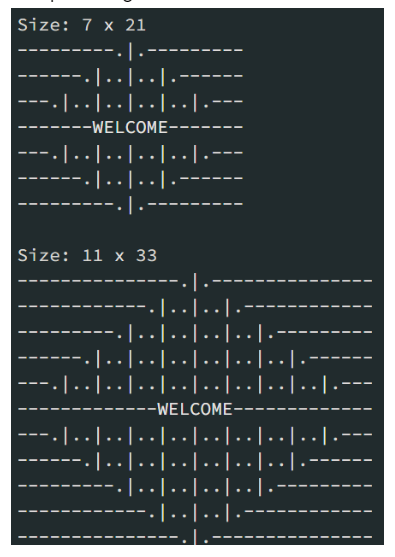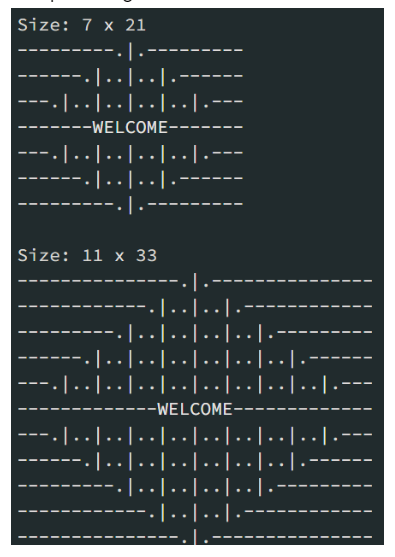
Mr. Karthiken works in a door mat manufacturing company. One day, he designed a new door mat with the following specifications:

a) Mat size must be N X M. (N is an odd natural number, and M is 3 times N.)                                                     b) The design should have ‘WELCOME’ written in the center.
c) The design pattern should only use |, . and – characters.

Sample Design is given above image, Write a python code for this.

Here is the Python code to generate a doormat design based on Mr. Karthiken's specifications:

In [1]:
def generate_doormat(width, height):
  """
  Generates a doormat design with the specified width and height.

  Args:
      width: The width of the doormat (integer).
      height: The height of the doormat (integer).

  Returns:
      A list of strings representing the doormat design.
  """

  if width % 2 == 0 or height % 2 == 0:
    raise ValueError("Width and height must be odd numbers")

  middle_height = height // 2
  design = []

  for i in range(height):
    # Top half
    if i < middle_height:
      num_dots = (width - 3 - 2 * i) // 2
      center_pattern = ".|." * i
      line = "-" * num_dots + center_pattern + "-" * num_dots
    # Center
    elif i == middle_height:
      line = "-" * ((width - len("WELCOME")) // 2) + "WELCOME" + "-" * ((width - len("WELCOME")) // 2)
    # Bottom half (reverse of top half)
    else:
      num_dots = (width - 3 - 2 * (height - i - 1)) // 2
      center_pattern = ".|." * (height - i - 1)
      line = "-" * num_dots + center_pattern + "-" * num_dots
    design.append(line)

  return design

# Example usage
width = 11
height = 33
doormat = generate_doormat(width, height)

for line in doormat:
  print(line)

--------
---.|.---
--.|..|.--
-.|..|..|.-
.|..|..|..|.
.|..|..|..|..|.
.|..|..|..|..|..|.
.|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|..|..|..|..|..|.
--WELCOME--
.|..|..|..|..|..|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|..|.
.|..|..|..|..|..|..|.
.|..|..|..|..|..|.
.|..|..|..|..|.
.|..|..|..|.
-.|..|..|.-
--.|..|.--
---.|.---
--------


This code defines a function generate_doormat that takes the width and height of the doormat as input. It first checks if the width and height are odd numbers. If not, it raises a ValueError.

The function then calculates the middle height of the doormat and creates an empty list to store the doormat design. It iterates through each row of the doormat and generates the appropriate design for that row.

For the top half of the doormat, the number of dots in the center pattern increases by 2 for each row.
The center row of the doormat contains the word "WELCOME" centered with hyphens on both sides.
For the bottom half of the doormat, the design is the reverse of the top half.
Finally, the function returns the list of strings representing the doormat design.

The example usage demonstrates how to call the generate_doormat function with a width of 11 and a height of 33. It then prints each line of the doormat design.

Q4.Given an array nums of n integers, return an array of all the unique quadruplets [nums[a], nums[b], nums[c], nums[d]] such that:

   a) 0 <= a, b, c, d < n
   b) a, b, c, and d are distinct.
   c) nums[a] + nums[b] + nums[c] + nums[d] == target

We can solve this problem by using a nested loop to fix two elements and then using two pointers to find the other two elements such that their sum equals the target. Here's a Python function to achieve this:

In [6]:
def fourSum(nums, target):
    nums.sort()
    n = len(nums)
    result = []

    for i in range(n - 3):
        if i > 0 and nums[i] == nums[i - 1]:
            continue
        for j in range(i + 1, n - 2):
            if j > i + 1 and nums[j] == nums[j - 1]:
                continue
            left = j + 1
            right = n - 1
            while left < right:
                total = nums[i] + nums[j] + nums[left] + nums[right]
                if total == target:
                    result.append([nums[i], nums[j], nums[left], nums[right]])
                    while left < right and nums[left] == nums[left + 1]:
                        left += 1
                    while left < right and nums[right] == nums[right - 1]:
                        right -= 1
                    left += 1
                    right -= 1
                elif total < target:
                    left += 1
                else:
                    right -= 1

    return result

# Example usage:
nums = [1, 0, -1, 0, -2, 2]
target = 0
print(fourSum(nums, target))


[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]


This function takes an array nums and a target value as input and returns a list of unique quadruplets whose sum equals the target.

SQL:

Given the following tables:
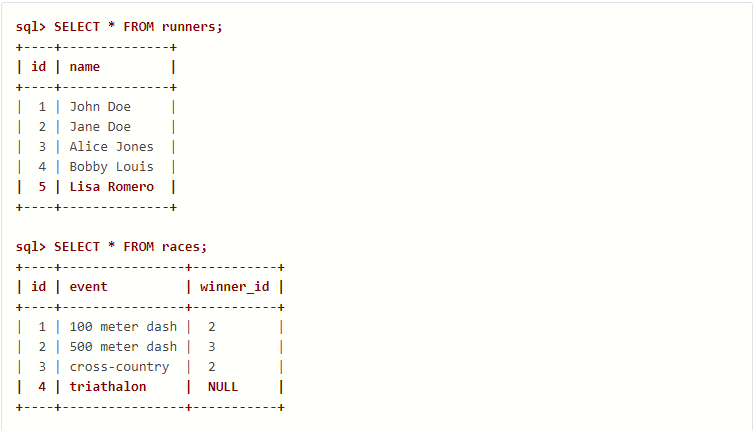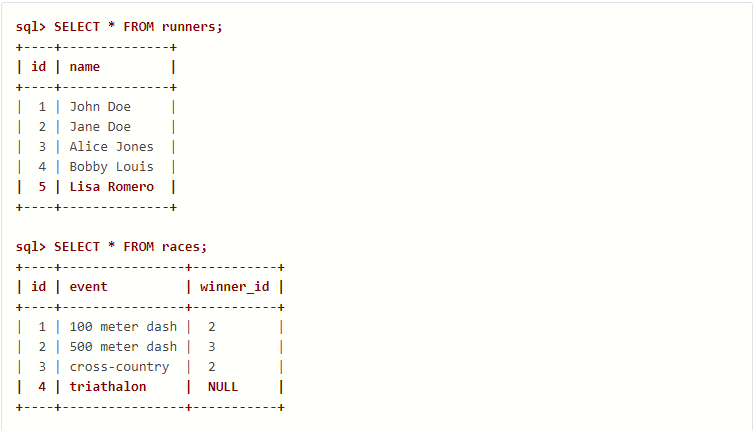

What will be the result of the query below?

SELECT * FROM runners WHERE id NOT IN (SELECT winner_id FROM races)

Explain your answer and also provide an alternative version of this query that will avoid the issue that it exposes.

The query retrieves all runners whose id is not present in the winner_id column of the races table. This means it selects runners that have never won a race.


NULL values: If the winner_id column in the races table allows null values, then a runner's id that is null will not be selected using this query, even if the runner has never won a race. This is because SQL treats null values differently in comparisons with non-null values.
Here's an alternative query that avoids this issue:

In [ ]:
SELECT *
FROM runners r
LEFT JOIN races ra ON r.id = ra.winner_id
WHERE ra.winner_id IS NULL;

This query uses a LEFT JOIN between the runners and races tables on the id and winner_id columns. The LEFT JOIN ensures that all runners are included in the result, even if there's no corresponding entry in the races table. The WHERE ra.winner_id IS NULL condition then selects only those runners where the join resulted in a null value in the winner_id column, indicating that the runner has never won a race.

Q2.Given two tables created as follows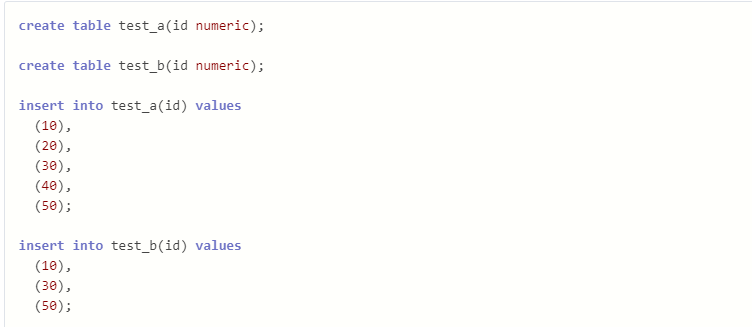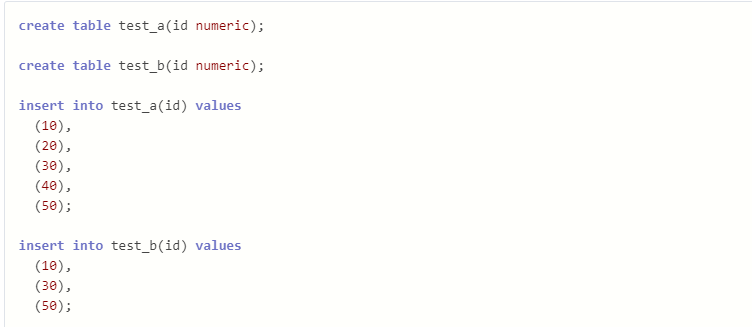

Write a query to fetch values in table test_a that are and not in test_b without using the NOT keyword.



We can use the following query to fetch values in test_a that are not in test_b without using the NOT keyword:

In [ ]:
SELECT * FROM test_a
EXCEPT
SELECT * FROM test_b;

This query uses the EXCEPT operator, which is available in most relational database management systems (RDBMS) like MySQL, Oracle, PostgreSQL, etc.

Here's how the EXCEPT operator works:

It executes the two subqueries, which in this case are SELECT * FROM test_a and SELECT * FROM test_b.
It removes the duplicate rows from the results of both queries.
It returns the rows that are present in the first query (selecting from test_a) but not in the second query (selecting from test_b).
In essence, the EXCEPT operator delivers the difference between the two result sets.

Q3.Given the following tables: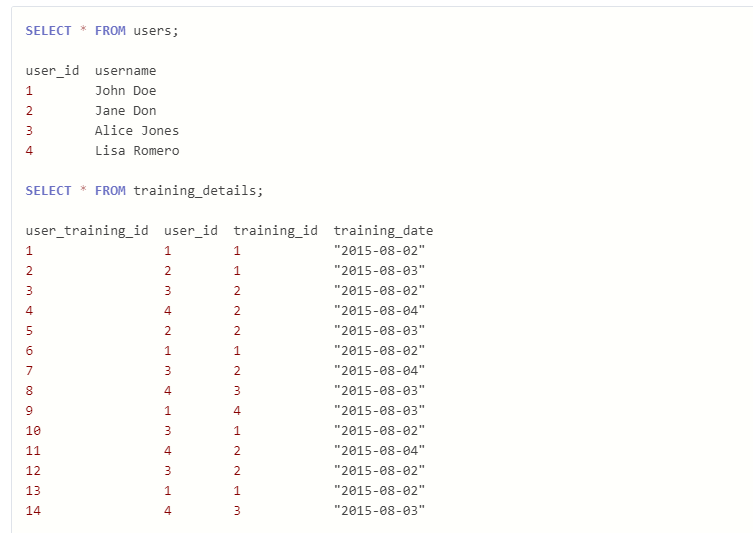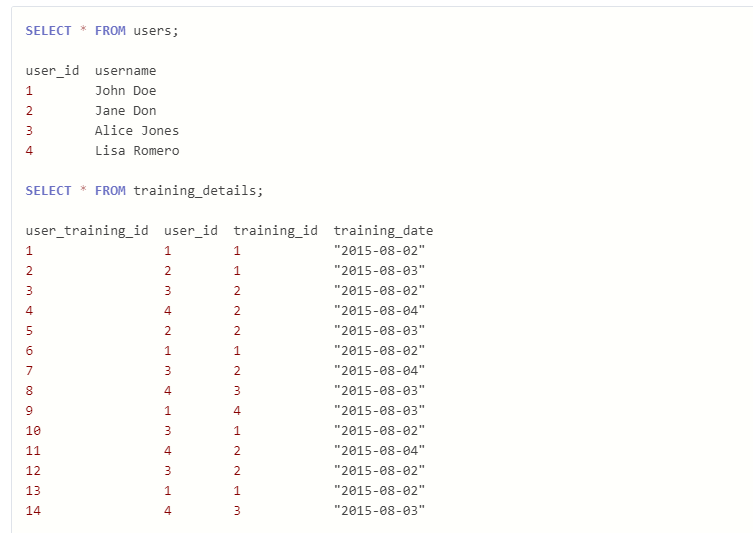

Write a query to to get the list of users who took the a training lesson more than once in the same day, grouped by user and training lesson, each ordered from the most recent lesson date to oldest date.



Here's a query to get the list of users who took a training lesson more than once in the same day, grouped by user and training lesson, ordered from the most recent lesson date to oldest date:

In [ ]:
SELECT user_id, training_id, MAX(training_date) AS most_recent_date
FROM training_details
GROUP BY user_id, training_id
HAVING COUNT(*) > 1
ORDER BY user_id, most_recent_date DESC;

This query achieves the results by following these steps:

Selects relevant data:

user_id: Identifies the user who took the training lesson.
training_id: Identifies the specific training lesson.
MAX(training_date) AS most_recent_date: Finds the most recent date a user took a particular training lesson using the MAX function and assigns an alias most_recent_date to the result.
Groups data:

GROUP BY user_id, training_id: Groups the data by user_id and training_id to ensure users and their training lesson instances are considered together.
Filters for multiple instances:

HAVING COUNT(*) > 1: Filters the grouped results to include only those where a user has taken the same training lesson more than once (COUNT(*) > 1).
Orders the results:

ORDER BY user_id, most_recent_date DESC: Orders the results first by user_id and then by most_recent_date in descending order (most recent to oldest).
This query effectively identifies users who participated in the same training lesson multiple times on the same day, grouped accordingly and sorted chronologically.


Consider the Employee table 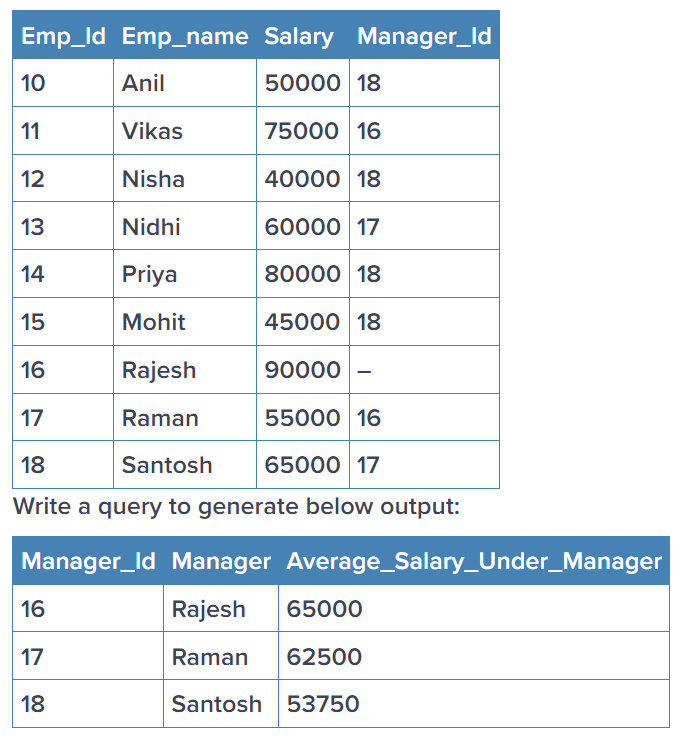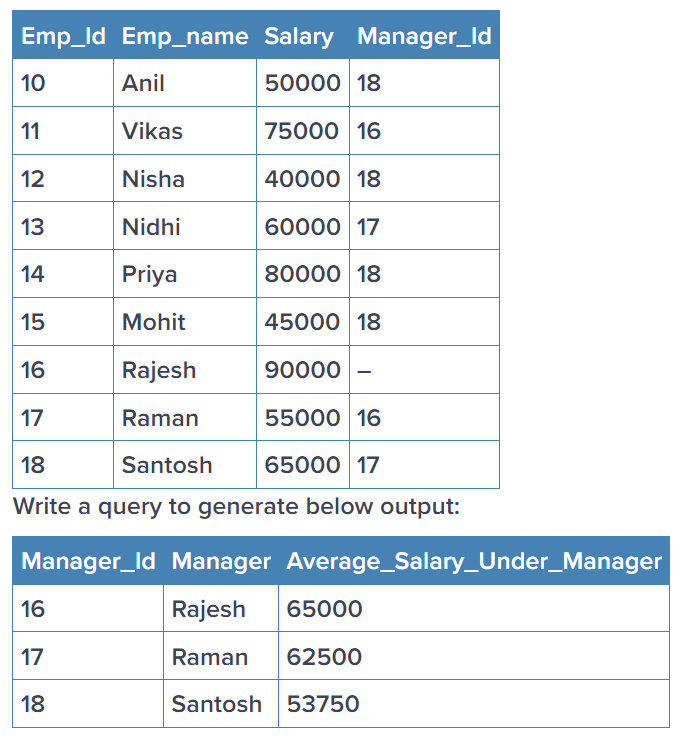

The Employee table contains the following columns:

* Emp_id (integer): The unique identifier for the employee.
* Emp_name (varchar): The name of the employee.
* Salary (float): The employee's salary.
* Manager_Id (integer): The identifier of the employee's manager (possibly null).

The table likely stores information about a company's employees, including their names, salaries, and manager relationships. Here's a breakdown of what the data might represent:

- **Emp_id:** This is a primary key that uniquely identifies each employee in the table.
- **Emp_name:** This column stores the employee's name.
- **Salary:** This column stores the employee's salary, likely a numerical value.
- **Manager_Id:** This column stores the Emp_id of the employee's manager. A null value in this column could indicate that the employee is a top-level manager with no superior, or it could be left empty for other reasons depending on how the table is designed.

Statistics:

Q1.What is the meaning of six sigma in statistics?  Give proper example

Six Sigma is a set of techniques and tools for process improvement. It seeks to improve the quality of the output of a process by identifying and removing the causes of defects and minimizing variability in manufacturing and business processes.

The term "Six Sigma" comes from the concept of standard deviation in statistics. A process that operates at Six Sigma quality is producing outputs that are 99.99966% defect-free, which corresponds to 3.4 defects per million opportunities.

For example, let's say you run a manufacturing process that produces widgets. A Six Sigma quality level would mean that out of every million widgets produced, only 3.4 would be defective. This high level of quality is achieved through rigorous process improvement efforts, statistical analysis, and adherence to quality control measures.

Q2. What type of data does not have a log-normal distribution or a Gaussian distribution?  Give proper example

Data that does not have a log-normal distribution or a Gaussian distribution includes categorical data and discrete data.

Categorical data represents categories or groups and cannot be measured on a continuous scale. Examples of categorical data include gender (male/female), eye color (blue/brown/green), and types of cars (sedan/SUV/truck).

Discrete data represents values that can only take on specific, distinct values and cannot be divided into smaller increments. Examples of discrete data include the number of students in a class, the number of cars in a parking lot, and the number of goals scored in a soccer match.

These types of data do not follow a log-normal or Gaussian distribution because they do not have a continuous range of values that can be measured or observed. Instead, they are represented by distinct categories or discrete values.

Q3. What is the meaning of the five-number summary in Statistics? Give proper example

The five-number summary in statistics is a set of descriptive statistics that provides a concise summary of the distribution of a dataset. It consists of five values: the minimum, the first quartile (Q1), the median (Q2), the third quartile (Q3), and the maximum.

1.Minimum: The smallest value in the dataset.
2.First Quartile (Q1): The value below which 25% of the data falls.
3.Median (Q2): The middle value of the dataset when it is ordered from smallest to largest. It represents the 50th percentile.
4.Third Quartile (Q3): The value below which 75% of the data falls.
5.Maximum: The largest value in the dataset.

For example, let's consider the following dataset:
{12,14,15,16,18,19,20,22,25,30}

The five-number summary would be:

Minimum: 12
Q1: 15
Median: 18.5
Q3: 22
Maximum: 30

Q4. What is correlation? Give an example with a dataset & graphical representation on jupyter Notebook

Correlation is a statistical measure that describes the degree to which two variables change together. In other words, it quantifies the relationship between two variables.

Correlation coefficients range from -1 to +1:

A correlation coefficient of +1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases.
A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases.
A correlation coefficient of 0 indicates no linear relationship between the variables.
Example dataset and graphical representation of correlation using Python and Jupyter Notebook:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print("Correlation coefficient:", correlation_coefficient)

# Plotting the dataset
plt.scatter(x, y)
plt.title("Scatter Plot of X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In this example, we have two variables, x and y, with values [1, 2, 3, 4, 5] and [2, 3, 4, 5, 6], respectively. The correlation coefficient calculated using np.corrcoef indicates a perfect positive correlation of +1 between x and y. The scatter plot visually represents this positive correlation, as the points follow a linear pattern upwards from left to right.

Machine learning:

Q1.Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question.

Content
The dataset contains 101 rows and 6 main features namely 'UserName', 'Caption', 'Followers', 'HashTags', 'Time Since Posted', 'Likes'. By now you must have understood the target feature or value to be predicted is the Likes column which has been referred to as "reach" so far.

To build a model that predicts the number of likes and time since posted based on features like username, caption, hashtags, and followers, we can follow these steps:

Data Preprocessing: We'll need to preprocess the data, which may include handling missing values, encoding categorical variables, and scaling numerical features.

Feature Engineering: We can extract useful information from text features like captions and hashtags, such as word count or presence of specific keywords.

Splitting the Data: We'll split the dataset into training and testing sets to evaluate the performance of the model.

Model Selection: We'll choose appropriate machine learning algorithms for regression tasks, considering the nature of the data and the problem.

Model Training: We'll train the selected models on the training data.

Model Evaluation: We'll evaluate the performance of the trained models using appropriate metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

Prediction: Finally, we'll use the trained model to make predictions on new data.

Here's a basic outline of the Python code to accomplish these steps:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv("instagram_dataset.csv")

# Data preprocessing
# Handle missing values, encode categorical variables, scale numerical features, etc.

# Feature engineering
# Extract useful information from text features like captions and hashtags

# Splitting the data into features (X) and target variables (y)
X = data[['UserName', 'Caption', 'Followers', 'HashTags', 'Time Since Posted']]
y_likes = data['Likes']
y_time_since_posted = data['Time Since Posted']

# Splitting the data into training and testing sets
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

# Model selection
like_model = LinearRegression()  # Example model for predicting likes
time_model = RandomForestRegressor()  # Example model for predicting time since posted

# Model training
like_model.fit(X_train, y_likes_train)
time_model.fit(X_train, y_time_train)

# Model evaluation
y_likes_pred = like_model.predict(X_test)
y_time_pred = time_model.predict(X_test)

mae_likes = mean_absolute_error(y_likes_test, y_likes_pred)
rmse_time = mean_squared_error(y_time_test, y_time_pred, squared=False)

print("Mean Absolute Error (Likes):", mae_likes)
print("Root Mean Squared Error (Time Since Posted):", rmse_time)


This code provides a basic framework for building and evaluating predictive models for predicting the number of likes and time since posted on Instagram based on various features. You'll need to fill in the preprocessing, feature engineering, and model selection parts based on the specific characteristics of your dataset and problem requirements.

In [ ]:
Q2.

Q3.Train and fine tune a decision tree using the wine dataset by following the following steps:-

  1. Use load_wine() to generate wine dataset
  2. Split the dataset into train and test  dataset
  3. Use random search CV to hyperparameter tune the Decision Tree
  4. Try to achieve an accuracy of at least 85%


Grow a random forest using the following steps:-

  1. Continuing the previous question, create 10 subsets of the training dataset. You can use the ShuffleSplit                class for it.
  2. Train 1 decision tree on each subset, using the best hyperparameter values found in the previous question.
  3. Evaluate all the trees on the test dataset. Are they performing better than the tree created in the previous question?

We can train and fine-tune a decision tree using the wine dataset and then grow a random forest:

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Step 1: Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

tree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Step 4: Train the decision tree with best hyperparameters
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)

# Evaluate the decision tree
accuracy = best_tree.score(X_test, y_test)
print("Decision Tree Accuracy:", accuracy)

# Step 1: Create 10 subsets of the training dataset using ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
forest_accuracy = []

# Step 2 & 3: Train 1 decision tree on each subset and evaluate on test dataset
for train_index, _ in shuffle_split.split(X_train):
    X_subset_train, y_subset_train = X_train[train_index], y_train[train_index]
    tree = DecisionTreeClassifier(**best_params)
    tree.fit(X_subset_train, y_subset_train)
    forest_accuracy.append(tree.score(X_test, y_test))

# Calculate average accuracy of random forest
avg_accuracy = sum(forest_accuracy) / len(forest_accuracy)
print("Random Forest Average Accuracy:", avg_accuracy)

This code first performs hyperparameter tuning for a decision tree using RandomizedSearchCV. Then it trains the decision tree with the best hyperparameters and evaluates its accuracy on the test dataset. Finally, it grows a random forest by training 10 decision trees on subsets of the training dataset and evaluates their performance on the test dataset.

Deep Learning:

Q1. (a) Explain how you can implement DL in a real-world application.

(b) What is the use of Activation function in Artificial Neural Networks? What would be the problem if we don't use it in ANN networks.

(a) Implementing deep learning (DL) in a real-world application involves several key steps:

Problem Definition: Clearly define the problem you want to solve using DL techniques. This could involve tasks such as image classification, object detection, natural language processing, etc.

Data Collection and Preprocessing: Gather and preprocess the data required for your application. This may involve tasks such as data cleaning, normalization, augmentation (for image data), and splitting the data into training, validation, and test sets.

Model Selection: Choose an appropriate DL model architecture based on your problem and data. This could include convolutional neural networks (CNNs) for image-related tasks, recurrent neural networks (RNNs) for sequence data, or transformer models for natural language processing tasks.

Model Training: Train the selected model using the training data. This involves optimizing the model parameters to minimize a loss function using techniques such as gradient descent or its variants. Training may involve hyperparameter tuning to optimize model performance.

Model Evaluation: Evaluate the trained model using the validation set to assess its performance and fine-tune hyperparameters if necessary. Use appropriate evaluation metrics depending on the problem at hand (e.g., accuracy, precision, recall, F1-score for classification tasks).

Deployment: Deploy the trained model into a real-world application environment. This may involve deploying the model on cloud platforms, edge devices, or embedding it into existing software systems. Ensure that the deployment process is robust, scalable, and efficient.

Monitoring and Maintenance: Continuously monitor the performance of the deployed model in real-world scenarios and fine-tune it as necessary. Update the model periodically to adapt to changes in data distribution or requirements of the application.

(b) Activation functions play a crucial role in artificial neural networks (ANNs) by introducing non-linearity into the model, allowing it to learn complex patterns and relationships in the data. The main uses of activation functions in ANNs are:

Introducing Non-linearity: Activation functions introduce non-linear transformations to the output of a neuron. Without non-linear activation functions, the entire network would behave like a single-layer perceptron, which can only learn linear mappings from input to output. Non-linear activation functions enable ANNs to model complex, non-linear relationships present in real-world data.

Enabling Learning of Complex Functions: Non-linear activation functions allow ANNs to approximate arbitrary complex functions, making them powerful function approximators. This enables ANNs to learn and represent complex patterns and relationships in data, making them suitable for a wide range of tasks such as image recognition, natural language processing, and time series forecasting.

Addressing Vanishing/Exploding Gradient Problem: Activation functions help in mitigating the vanishing or exploding gradient problem during backpropagation, which can occur in deep networks with many layers. By introducing non-linearities, activation functions ensure that gradients are propagated effectively through the network during training, leading to more stable and efficient learning.

If we don't use activation functions in ANN networks, the network would essentially be a linear model, unable to learn complex patterns and relationships in the data beyond linear transformations. This would severely limit the expressive power of the model, resulting in poor performance on tasks that require capturing non-linearities in the data. Additionally, without activation functions, the network would not be able to address the vanishing or exploding gradient problem, making training deep networks with many layers challenging or even infeasible.

Q2. Train a Pure ANN with less than 10000 trainable parameters using the MNIST Dataset

To train a pure artificial neural network (ANN) with less than 10,000 trainable parameters using the MNIST dataset, we can design a simple architecture with a small number of layers and neurons. Here's a basic outline of how to achieve this using TensorFlow and Keras:

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0  # Flatten and normalize
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten input images
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

This code snippet does the following:

Loads the MNIST dataset.
Preprocesses the data by flattening and normalizing the input images and one-hot encoding the labels.
Defines a simple ANN architecture with one input layer (flattened), two hidden layers with 128 and 64 neurons respectively, and an output layer with 10 neurons for classification.
Compiles the model with the Adam optimizer and categorical cross-entropy loss.
Trains the model on the training data for 10 epochs with a batch size of 32.
Evaluates the trained model on the test data and prints the test accuracy.
This simple ANN architecture should have less than 10,000 trainable parameters while achieving decent performance on the MNIST dataset. Adjustments to the architecture or hyperparameters may be necessary to achieve the desired level of accuracy.

Q3.Perform Regression Task using ANN

Note: You are feel free to use any Regression ML dataset

To perform a regression task using an artificial neural network (ANN), we'll use the Boston Housing dataset, which contains information about housing prices in Boston. Here's how you can do it using TensorFlow and Keras:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


In this code:

We load the Boston Housing dataset using boston_housing.load_data() function from Keras.
We normalize the input features using StandardScaler from scikit-learn.
We define a simple ANN architecture with two hidden layers, ReLU activation functions, and dropout layers to reduce overfitting.
We compile the model using the Adam optimizer and mean squared error loss function.
We train the model on the training data for 100 epochs with a batch size of 32 and 20% validation split.
Finally, we evaluate the trained model on the test data and calculate the mean squared error.